In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
bank = pd.read_csv('bank-full.csv',sep=';')

In [9]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA Process

In [10]:
bank.shape

(45211, 17)

In [11]:
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [12]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
# Checking the data types
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
bank.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
sns.heatmap(bank.isnull())

In [ ]:
bank.info()

In [ ]:
bank1 = pd.get_dummies(bank,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
bank1['y']=bank1['y'].replace('yes',1)
bank1['y']=bank1['y'].replace('no',0)

In [ ]:
bank1

#  Model Creation

In [44]:
X = bank1.drop(columns='y')
y = bank1['y']

In [45]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [46]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [52]:
model.predict(xtest)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
model.score(xtrain,ytrain)

0.892185673207571

In [54]:
from sklearn.metrics import classification_report

In [55]:
ypred = model.predict(X)

In [56]:
print(classification_report(y,ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.24      0.34      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.61      0.64     45211
weighted avg       0.87      0.89      0.87     45211



In [32]:
from sklearn.metrics import confusion_matrix

In [57]:
# Confusion Matrix for the model accuracy
confusion_matrix(y,ypred)

array([[39059,   863],
       [ 4018,  1271]], dtype=int64)

In [58]:
# Checking model score by confusion matrix
(39059+1271)/(39059+1271+4018+863)

0.8920395478976355

In [59]:
df = pd.DataFrame({'y actual':y,'Y Predicted':ypred})

In [60]:
df

,y actual,Y Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [61]:
model.predict_proba(X)

array([[0.96891806, 0.03108194],
       [0.97914132, 0.02085868],
       [0.98095822, 0.01904178],
       ...,
       [0.31672955, 0.68327045],
       [0.90513268, 0.09486732],
       [0.83922522, 0.16077478]])

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [63]:
fpr,tpr,threshold = roc_curve(y,model.predict_proba(X)[:,1])

0.6093464620350769

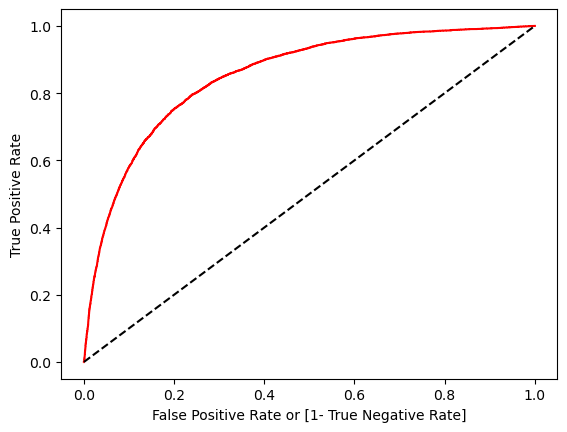

In [64]:
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')

plt.xlabel('False Positive Rate or [1- True Negative Rate]')
plt.ylabel('True Positive Rate')
roc_auc_score(y,ypred)

In [65]:
bank1['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [66]:
from imblearn.over_sampling import SMOTE

# SMOTE Model

In [76]:
xtrain_re,ytrain_re= SMOTE(random_state=42).fit_resample(xtrain,ytrain)

In [82]:
# Equalizing the counts of 0 and 1

ytrain_re.value_counts()

0    27956
1    27956
Name: y, dtype: int64

In [83]:
res_reg =  LogisticRegression()

In [84]:
model1 = res_reg.fit(xtrain_re,ytrain_re)

In [85]:
ypred1=model1.predict(xtest)

In [86]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     11966
           1       0.43      0.62      0.51      1598

    accuracy                           0.86     13564
   macro avg       0.69      0.76      0.71     13564
weighted avg       0.89      0.86      0.87     13564



In [87]:
model1.predict_proba(X)

array([[9.89547918e-01, 1.04520822e-02],
       [9.96862282e-01, 3.13771843e-03],
       [9.99493306e-01, 5.06693630e-04],
       ...,
       [6.89600547e-04, 9.99310399e-01],
       [5.45532492e-01, 4.54467508e-01],
       [1.20096730e-01, 8.79903270e-01]])

In [88]:
fpr1,tpr1,threshold1 = roc_curve(y,model1.predict_proba(X)[:,1])

0.7561082014393304

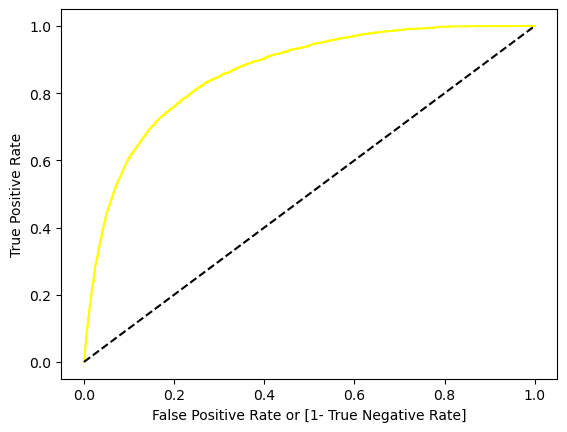

In [89]:
plt.plot(fpr1,tpr1,color='yellow')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1- True Negative Rate]')
plt.ylabel('True Positive Rate')
roc_auc_score(ytest,ypred1)